#Introduction

Dear Candidate, 

The intention of this exercise is to examine basic Data Analysis and be a basis for a future technical discussion. It is NOT intended to serve as a stress test. So, if any of the tasks is taking too long, you are welcomed to skip it and discuss it verbally with your recruiting manager at the end of this exercise (instead of providing a detailed response here).

We appreciate your time and effort in working on this exercise as part of your interview process! 

Good Luck!

#Exercise Setup

In [ ]:
# pip packages installation

!pip install PyDrive
!pip install pandasql

In [ ]:
# added the last line-maayan
import os
import glob
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt 

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Anthem excercise covid dataset path
excercise_data_st = {'covid_dat_exercise_latam.csv': {'id':'1F9XjmAtIUD5Xs91T9VRbgl4qrXZUt7qB'},
                     'WHO-COVID-19-latam-data-for-exercise.csv': {'id':'16CkPZm-Rz5JPIDu7kxfbsXVUCoCs0bb5'}}

In [ ]:
# connect to your google drive account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# setup the excercise folder
# excercise_path = '/content/Anthem_interview_ex'
excercise_path = '/content/Anthem_interview_ex'
if not os.path.exists(excercise_path):
    os.makedirs(excercise_path)
    os.chdir(excercise_path)

In [ ]:
os.getcwd()

'/content/sample_data'

In [ ]:
# download all the excercise files
for file_name, shared_path_st in excercise_data_st.items():
    print('downloading {}'.format(file_name))
    downloaded = drive.CreateFile(shared_path_st)
    downloaded.GetContentFile(file_name)

downloading covid_dat_exercise_latam.csv
downloading WHO-COVID-19-latam-data-for-exercise.csv


In [ ]:
# verifying all files have been downloaded properly

print(excercise_path); print(glob.glob(os.path.join(excercise_path,'*.*')))

/content/Anthem_interview_ex
['/content/Anthem_interview_ex/covid_dat_exercise_latam.csv', '/content/Anthem_interview_ex/WHO-COVID-19-latam-data-for-exercise.csv']


In [ ]:
# reading the first spreadsheet into pandas pd:
covid_dat = pd.read_csv(os.path.join(excercise_path,'covid_dat_exercise_latam.csv'))
covid_dat

,Unnamed: 0,id,sex,patient_type,country_cd,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,16169f,Female,1.0,BR,NaN,02/05/2020,9999-99-99,97.0,2.0,27.0,97.0,NaN,2.0,NaN,2.0,2.0,2.0,NaN,FALSE,NaN,2.0,2.0,1.0,NaN
1,1,NaN,Female,1.0,NaN,19/03/2020,NaN,9999-99-99,97.0,2.0,24.0,97.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,FALSE,2.0,2.0,99.0,1.0,NaN
2,2,167386,NaN,2.0,HN,06/04/2020,01/04/2020,9999-99-99,2.0,2.0,54.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,99.0,1.0,NaN
3,3,0b5948,Female,2.0,MX,NaN,10/04/2020,9999-99-99,2.0,1.0,30.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,FALSE,2.0,NaN,99.0,1.0,2.0
4,4,0d01b5,Male,2.0,PA,13/04/2020,NaN,NaN,2.0,NaN,60.0,NaN,1.0,2.0,NaN,2.0,1.0,2.0,1.0,FALSE,2.0,NaN,99.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,566597,01ff60,Female,1.0,CO,13/05/2020,NaN,9999-99-99,97.0,2.0,58.0,97.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,FALSE,2.0,2.0,NaN,NaN,97.0
566598,566598,047cd1,Male,1.0,PR,07/04/2020,06/04/2020,9999-99-99,NaN,2.0,48.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,2.0,2.0,2.0,3.0,97.0
566599,566599,1beb81,Male,NaN,PE,14/05/2020,NaN,9999-99-99,2.0,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,TRUE,2.0,2.0,99.0,3.0,NaN
566600,566600,NaN,Male,NaN,NaN,31/05/2020,29/05/2020,9999-99-99,NaN,1.0,43.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,FALSE,2.0,2.0,2.0,3.0,97.0


In [ ]:
# reading the second spreadsheet into pandas pd:
covid_WHO_dat = pd.read_csv(os.path.join(excercise_path,'WHO-COVID-19-latam-data-for-exercise.csv'))
covid_WHO_dat

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,03/01/2020,BO,Bolivia (Plurinational State of),AMRO,0,0,0,0
1,04/01/2020,BO,Bolivia (Plurinational State of),AMRO,0,0,0,0
2,05/01/2020,BO,Bolivia (Plurinational State of),AMRO,0,0,0,0
3,06/01/2020,BO,Bolivia (Plurinational State of),AMRO,0,0,0,0
4,07/01/2020,BO,Bolivia (Plurinational State of),AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
10795,20/08/2021,VE,Venezuela (Bolivarian Republic of),AMRO,1005,321927,14,3844
10796,21/08/2021,VE,Venezuela (Bolivarian Republic of),AMRO,830,322757,15,3859
10797,22/08/2021,VE,Venezuela (Bolivarian Republic of),AMRO,769,323526,12,3871
10798,23/08/2021,VE,Venezuela (Bolivarian Republic of),AMRO,1116,324642,15,3886


In [ ]:
covid_dat.columns

Index(['Unnamed: 0', 'id', 'sex', 'patient_type', 'country_cd', 'entry_date',
       'date_symptoms', 'date_died', 'intubed', 'pneumonia', 'age',
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [ ]:
covid_WHO_dat.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [ ]:
os.chdir('/content/sample_data')

In [ ]:
%%time

# A simple SQL query example that runs on Pandas DataFrame variable "covid_dat":

query_str = """

  SELECT 
        df.pneumonia,
        count(df.id)

  FROM covid_dat df

  WHERE df.sex = 'Female'

  GROUP BY 1

  """

sql_run_result_df = ps.sqldf(query_str, locals())   # use locals() as-is for any query_str you run

print(sql_run_result_df)



   pneumonia  count(df.id)
0        NaN         37101
1        1.0         27215
2        2.0        119460
3       99.0             1
CPU times: user 43.9 s, sys: 5.11 s, total: 49 s
Wall time: 56.2 s


#Exercise Body

This exercise is based on two datasets, each resides within it's own .csv file:


1.   **Covid-19 patient pre-condition dataset -**


  >  Data column description: https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv


  > **Note:** While this original dataset is based on Mexican patients only, we have adapted it to represent various latin american countries for the sake of this exercise.
  


2.  **WHO Covid-19 country dataset - Latin America**



> Daily Covid-19 cases and deaths by country


You can choose between solving this exercise within this notebook, or by downloading both datasets (hit the "Files" icon on the toolbar to the left to find both .csv's and download them) to your computer and using any other application you'd like (Excel, Tableau, etc.) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SQL (or other coding language you are familiar with) (90-120min):**
##### 1. List all COVID-19 'patient_type' and diabetes unique values combinations and count the number of members for each such combination. Describe the relationship you see between the two variables.
##### 2. Present the distribution of patient death occurence (count) by age and briefly explain the results obtained
##### 3. For each patient in the patient level dataset 'covid_dat_exercise_latam', add columns which indicate their country's total cases & total deaths in 2021.
##### 4. Calculate the precentage of intubed patients for patients originating from the top 10 countries by death rate. 
##### 5. BONUS (only if time permits): What additional information would you need in order to calculate the precentage of new COVID-19 cases out of overall **active cases** in Mexico, per each month in 2021?


#### Good Luck!!

In [ ]:
 #1)
%%time

query_str = """

  SELECT 
        df.patient_type, df.diabetes,
        count(df.id) AS Count_Patients

  FROM covid_dat df
  GROUP BY df.patient_type,df.diabetes
  ORDER BY df.patient_type,count(df.id) DESC


  """

sql_run_result_df = ps.sqldf(query_str, locals())   # use locals() as-is for any query_str you run

print(sql_run_result_df)



    patient_type  diabetes  Count_Patients
0            NaN       2.0           63390
1            NaN       NaN           18101
2            NaN       1.0            8788
3            NaN      98.0             248
4            1.0       2.0          208925
5            1.0       NaN           56825
6            1.0       1.0           18190
7            1.0      98.0             682
8            2.0       2.0           43790
9            2.0       1.0           18351
10           2.0       NaN           15555
11           2.0      98.0             346
CPU times: user 36.8 s, sys: 3.77 s, total: 40.6 s
Wall time: 40.6 s


## 1) patient_type and diabetes unique values combinations count.
# Describe the relationship- 
# the highest number of cases happens with patient type 1 (I believe that means 
# that the patient had returned home-outpatient) and diabetes 2(208925) 
# lowest number of cases occur with diabetes type 98, regardless of patient type 
# the highest number of cases occur with diabetes 2, regardless of patient_type
# diabetes 1 is in between this range, regardless of patient type. 
# there are more than 3.5 times cases with patient type 1 than type 2,
# regardless of diabetes

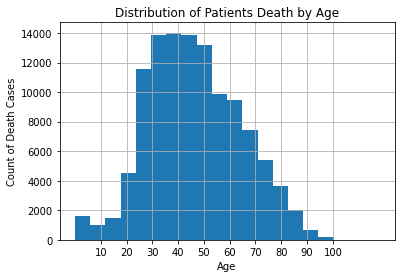

In [ ]:
#2)
#I assumed that cases where the date_died were missing (NaN), or filled as 
# 9999-99-99 meant that the patient is alive. In case my assumption was wrong,
# please uncomment the line of code below, and comment the line that creates an 
# histogram without na. 
covid_without_na=covid_dat.query('date_died !="NaN" and date_died !="9999-99-99"')
#covid_dat["age"].hist(bins=25)
covid_without_na["age"].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count of Death Cases')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.title('Distribution of Patients Death by Age')

plt.show()

#2) 
# The results indicates that most of the death cases occured for patients aged 30-55.  
# There is a big rise in death cases at around 25, and the trend shifts 
# at around 55, with less death occurence. 


In [ ]:
#3)
covid_patients=covid_dat[["id","country_cd"]].drop_duplicates()
covid_countries=covid_WHO_dat.groupby("Country_code")["Cumulative_deaths","Cumulative_cases"].nunique()

covid_merged= covid_patients.merge(covid_countries, left_on='country_cd', right_on='Country_code', how='left').sort_values('country_cd')
print(covid_merged)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


              id country_cd  Cumulative_deaths  Cumulative_cases
381301    0ee4e7         BO              506.0             523.0
192291  7.39E+04         BO              506.0             523.0
416756    10fa26         BO              506.0             523.0
192313    1775dc         BO              506.0             523.0
192314    1598fd         BO              506.0             523.0
...          ...        ...                ...               ...
194287    13a2ee         VE              440.0             503.0
416424    1e14d2         VE              440.0             503.0
193937    1a9481         VE              440.0             503.0
452820    0021c9         VE              440.0             503.0
1            NaN        NaN                NaN               NaN

[452821 rows x 4 columns]


In [ ]:
#4) Again my assumption that date_died NaN or 9999-99-99 meant that the patient is alive

query_str = """

  SELECT 
        df.country_cd, count(df.date_died) AS Count_Dead, 
        df.intubed/count(df.id)*100 AS Percent_Dead_Intubed
        
  FROM covid_dat df
  
  WHERE df.date_died != 'NaN' AND df.date_died != '9999-99-99' AND
        country_cd != "None"

  GROUP BY df.country_cd
  ORDER BY count(date_died) DESC
  LIMIT 10

  """

sql_run_result_df = ps.sqldf(query_str, locals())   # use locals() as-is for any query_str you run

print(sql_run_result_df)

  country_cd  Count_Dead  Percent_Dead_Intubed
0         CR        1374              0.145560
1         PR        1341              0.074571
2         EC        1331                   NaN
3         TT        1328              0.150602
4         HN        1308              0.152905
5         CL        1303              0.076746
6         BO        1301              0.076864
7         JM        1291                   NaN
8         GT        1290              0.155039
9         PE        1289              0.155159


5) I would need Cumulative_recovered information, or exit_date, or synptoms_end
Currently I only have info about deaths, new cases and cumulative cases, but I can't assume that the ones that aren't dead are still active cases. 





In [ ]:
#5) the code should look something like that:
#query_str = """

#SELECT New_cases/(Cumulative_cases-Cumulative_deaths-cumulative_recovered) AS active_cases
#, EXTRACT(month FROM date_reported) AS month,country
#FROM covid_WHO_dat
#WHERE Country=="Mexico"
#GROUP BY month 
#  """

#sql_run_result_df = ps.sqldf(query_str, locals())   # use locals() as-is for any query_str you run

#print(sql_run_result_df)
